<a href="https://colab.research.google.com/github/hannahestauss/Portfolio/blob/main/Happiness_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Happiness Analysis

This report analyzes the United States' spot on the happiness index in the last five years, intending to provide more insight on the social, political, and economic standing. In most years, contries that top the index tend to have very different cultures and economies than that of the United States. 


This notebook analyzes the top 38 Happiest Countries using the World Data Bank's studies on Worldwide Governance Indicators and women in government and the Gallup Startup Polls for the annual Happiness Index Report. These datasets include different social, economic, and political factors that can be correlated with happiness and analyzed over the past five years. Using the merged data, this dataset will also allow us to see the United States' ranking in individual factors to answer the questions: Why is the US considered one of the happiest countries? What factors have the most impact on happiness? How does the United States compare socially, politically, and economically?

# Approach

As of 2021, the United States ranked 19th on the Happiness Index. In order to analyze their spot there, this report merges data from the top 38 countries. 

The United States' happiness will be broken down into social, political, and economic factors and compared with those of countries that surround them in the happiness index, with the United States happiness falling at the median. Analyzing the correlation between these groups and happiness will tell us how much these values, or the differences in them, really impacts the happiness of people in these countries. 

# Background


**Happiness Scores:**
Gallup asks people to imagine a ladder, with the lowest rung representing the worst possible life and the highest rung representing the best possible life. People rate where they stand today and where they expect to stand in five years. Based on how they respond, Gallup classifies them as thriving, struggling or suffering.

**Government Effectiveness** captures the perceptions of the quality of public services, the quality of civil service, and the degree of its independence from political pressures on a scale from -2.5 - 2.5.
**Regulatory Quality** captures perceptions of the ability of the government to formulate and implement sound policies and regulations that promote private sector development from -2.5 to 2.5.
**Rule of Law** captures perceptions of the extent to which agents have the confidence in and abide by the rule of society, as well as the likelihood of crime and violence from -2.5 to 2.5.
**Voice and Accountability** captures perceptions of the extent to which a country’s citizens are able to participate in selecting their government, as well as the freedom of expression, freedom of association, and free media from -2.5 to 2.5.
**Control of Corruption** captures perceptions of the extent to which public power is used for private gain, as well as the “capture” of the state by elites and private interests.

# Imports

Link to All CSV Files:
https://drive.google.com/drive/folders/1MJbeDlOQIiekhNfzfyceNZUqM0HUfit7?usp=sharing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [ ]:
#import uploaded files
Factors = pd.read_csv("Factors.csv", sep=',')
Gender = pd.read_csv("Women.csv", on_bad_lines='skip')
Happiness = pd.read_csv("world-happiness-report.csv")


To clean and combine these datasets, a few steps will take place first:


1.   The countries in the datasets must match.
2.   The datasets must share an index (Country Name and Year)
3.   Unnamed columns must be removed.
4.   The years in the datsets must match, and be the same datatype.




# Cleaning Gender Dataset

In [ ]:
#Drop Unnamed Columns
Gender.drop(Gender.columns[Gender.columns.str.contains('Unnamed',case = False)],axis = 1, inplace = True)
print(Gender.dtypes)
#Check datatypes for future combination and calculation

Country_Name     object
2011            float64
2012            float64
2013            float64
2014            float64
2015            float64
2016            float64
2017            float64
2018            float64
2019            float64
2020            float64
dtype: object


In [ ]:
#Top 38 Countries from Happiness Index 2021
countries = ['Finland', 'Denmark', 'Switzerland', 'Iceland', 'Netherlands', 'Norway', 'Sweden', 'Luxembourg', 'New Zealand', 'Austria', 'Israel', 'Germany', 'Canada', 'Ireland', 'Costa Rica', 'United Kingdom', 'Czech Republic', 'United States', 'France', 'Belgium',
             'Bahrain','Malta','Taiwan','United Arab Emirates','Saudi Arabia','Spain','Italy','Slovenia','Guatemala','Uruguay','Singapore','Slovakia','Brazil','Mexico','Jamaica','Lithuania','Cyprus']
Gender = Gender[Gender.Country_Name.isin(countries)]
Gender = Gender.melt(id_vars=["Country_Name"], 
        var_name="Year", 
        value_name="Women_In_Government",
        ignore_index= False)
Gender['Year']=Gender['Year'].astype(int)
years = {2016,2017,2018,2019,2020}
Gender = Gender[Gender.Year.isin(years)]
Gender.reset_index
Gender.dropna(axis=0, how='all', thresh=None, subset=None, inplace=True)
Gender.stack()
#Index by Year and Country
Gender.set_index(['Year','Country_Name'], inplace= True)
print(Gender.index)

MultiIndex([(2016, 'United Arab Emirates'),
            (2016,              'Austria'),
            (2016,              'Belgium'),
            (2016,              'Bahrain'),
            (2016,               'Brazil'),
            (2016,               'Canada'),
            (2016,          'Switzerland'),
            (2016,           'Costa Rica'),
            (2016,               'Cyprus'),
            (2016,       'Czech Republic'),
            ...
            (2020,                'Malta'),
            (2020,          'Netherlands'),
            (2020,               'Norway'),
            (2020,          'New Zealand'),
            (2020,         'Saudi Arabia'),
            (2020,            'Singapore'),
            (2020,             'Slovenia'),
            (2020,               'Sweden'),
            (2020,              'Uruguay'),
            (2020,        'United States')],
           names=['Year', 'Country_Name'], length=175)


In [ ]:
print(Gender['Women_In_Government'])

Year  Country_Name        
2016  United Arab Emirates    22.500000
      Austria                 30.601093
      Belgium                 39.333333
      Bahrain                  7.500000
      Brazil                   9.941520
                                ...    
2020  Singapore               29.473684
      Slovenia                27.777778
      Sweden                  46.991404
      Uruguay                 21.212121
      United States           27.464789
Name: Women_In_Government, Length: 175, dtype: float64


# Cleaning Factors Dataset

In [ ]:
print(Factors.columns)

Index(['Country Name', 'Country Code', 'Series Name', 'Series Code',
       '2016 [YR2016]', '2017 [YR2017]', '2018 [YR2018]', '2019 [YR2019]',
       '2020 [YR2020]'],
      dtype='object')


In [ ]:
Factors.replace({'Slovak Republic': 'Slovakia', 'Taiwan, China': 'Taiwan'})

,Country Name,Country Code,Series Name,Series Code,2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Finland,FIN,Control of Corruption: Estimate,CC.EST,2.233331,2.211039,2.211138,2.153200,2.204168
1,Finland,FIN,Government Effectiveness: Estimate,GE.EST,1.877939,2.018676,2.055259,2.006594,1.948935
2,Finland,FIN,Political Stability and Absence of Violence/Te...,PV.EST,0.999086,1.080909,0.908359,0.851657,0.944625
3,Finland,FIN,Regulatory Quality: Estimate,RQ.EST,1.817408,1.823055,1.785690,1.851164,1.854752
4,Finland,FIN,Rule of Law: Estimate,RL.EST,2.049946,2.069357,2.079443,2.058016,2.078883
...,...,...,...,...,...,...,...,...,...
228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,Data from database: Worldwide Governance Indic...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
Factors.reset_index()
Factors.rename(columns={'Country Name': 'Country_Name', 'Series Name': 'Series_Name'},  inplace=True)
Factors.rename(columns={'2016 [YR2016]': '2016', '2017 [YR2017]': '2017','2018 [YR2018]': '2018','2019 [YR2019]': '2019','2020 [YR2020]': '2020'},  inplace=True)


In [ ]:
Factors.sort_index(inplace=True)
Factors = Factors.dropna(how='all',axis=0) 
print(Factors.index)

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            220, 221, 222, 223, 224, 225, 226, 227, 231, 232],
           dtype='int64', length=230)


In [ ]:
Factors.head

<bound method NDFrame.head of                                           Country_Name Country Code  \
0                                              Finland          FIN   
1                                              Finland          FIN   
2                                              Finland          FIN   
3                                              Finland          FIN   
4                                              Finland          FIN   
..                                                 ...          ...   
225                                            Denmark          DNK   
226                                            Denmark          DNK   
227                                            Denmark          DNK   
231  Data from database: Worldwide Governance Indic...          NaN   
232                           Last Updated: 09/27/2021          NaN   

                                           Series_Name Series Code      2016  \
0                      Control of Cor

In order to clean this dataset, I found it easiest to break down by the series name/metric being measured. Later, I will combine the smaller Dataframes with the main dataframe individually.

In [ ]:
Corruption = Factors.loc[Factors['Series_Name'] == "Control of Corruption: Estimate"]
#Create a Dataframe with one column named "Control_Of_Corruption" with the corresponding value
Corruption = Corruption.melt(id_vars=["Country_Name", "Country Code", "Series Code", "Series_Name"], 
        var_name="Year", 
        value_name="Control_Of_Corruption",
        ignore_index= False)
Corruption.drop(columns=['Country Code', 'Series Code', 'Series_Name'], inplace= True)
Corruption['Year']=Corruption['Year'].astype(int)
Corruption.reset_index()
#Set a matching index
Corruption.set_index(['Year','Country_Name'], inplace=True)


Repeat this process for every column that I want to combine into the main dataframe later on.

In [ ]:
GovEffectiveness = Factors.loc[Factors['Series_Name'] == "Government Effectiveness: Estimate"]
GovEffectiveness = GovEffectiveness.melt(id_vars=["Country_Name", "Country Code", "Series Code", "Series_Name"], 
        var_name="Year", 
        value_name="Government_Effectiveness",
        ignore_index= False)
GovEffectiveness.drop(columns=['Country Code', 'Series Code', 'Series_Name'], inplace= True)
GovEffectiveness['Year']=GovEffectiveness['Year'].astype(int)
GovEffectiveness.reset_index()
GovEffectiveness.set_index(['Year','Country_Name'], inplace=True)

In [ ]:
Stability = Factors.loc[Factors['Series_Name'] == "Political Stability and Absence of Violence/Terrorism: Estimate"]
Stability = Stability.melt(id_vars=["Country_Name", "Country Code", "Series Code", "Series_Name"], 
        var_name="Year", 
        value_name="Stability_And_Absence_Of_Terrorism",
        ignore_index= False)
Stability.drop(columns=['Country Code', 'Series Code', 'Series_Name'], inplace= True)
Stability['Year']=Stability['Year'].astype(int)
Stability.reset_index()
Stability.set_index(['Year','Country_Name'], inplace=True)

In [ ]:
Voice_And_Accountability = Factors.loc[Factors['Series_Name'] == "Voice and Accountability: Estimate"]
Voice_And_Accountability = Voice_And_Accountability.melt(id_vars=["Country_Name", "Country Code", "Series Code", "Series_Name"], 
        var_name="Year", 
        value_name="Voice_And_Accountability",
        ignore_index= False)
Voice_And_Accountability.drop(columns=['Country Code', 'Series Code', 'Series_Name'], inplace= True)
Voice_And_Accountability['Year']=Voice_And_Accountability['Year'].astype(int)
Voice_And_Accountability.reset_index()
Voice_And_Accountability.set_index(['Year','Country_Name'], inplace= True)

In [ ]:
Regulatory_Quality = Factors.loc[Factors['Series_Name'] == "Regulatory Quality: Estimate"]
Regulatory_Quality = Regulatory_Quality.melt(id_vars=["Country_Name", "Country Code", "Series Code", "Series_Name"], 
        var_name="Year", 
        value_name="Regulatory_Quality",
        ignore_index= False)
Regulatory_Quality.drop(columns=['Country Code', 'Series Code', 'Series_Name'], inplace= True)
Regulatory_Quality['Year']=Regulatory_Quality['Year'].astype(int)
Regulatory_Quality.reset_index()
Regulatory_Quality.set_index(['Year','Country_Name'], inplace= True)

In [ ]:
Rule_of_Law = Factors.loc[Factors['Series_Name'] == "Rule of Law: Estimate"]
Rule_of_Law = Rule_of_Law.melt(id_vars=["Country_Name", "Country Code", "Series Code", "Series_Name"], 
        var_name="Year", 
        value_name="Rule_of_Law",
        ignore_index= False)
Rule_of_Law.drop(columns=['Country Code', 'Series Code', 'Series_Name'], inplace= True)
Rule_of_Law['Year']=Rule_of_Law['Year'].astype(int)
Rule_of_Law.reset_index()
Rule_of_Law.set_index(['Year','Country_Name'], inplace=True)

# Cleaning Happiness Dataset

In [ ]:
Happiness

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1945,Zimbabwe,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1946,Zimbabwe,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212
1947,Zimbabwe,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235


In [ ]:
Happiness.rename(columns={'Country name': 'Country_Name', 'Log GDP per capita': 'GDP','Social support': 'Social_Support', 'year':'Year', 
                          'Healthy life expectancy at birth': 'Life_Expectancy', 'Life Ladder': 'Happiness'},  inplace=True)
Happiness = Happiness[Happiness.Country_Name.isin(countries)]
years = {2016,2017,2018,2019,2020}
Happiness = Happiness[Happiness.Year.isin(years)]
Happiness.drop(columns=['Positive affect', 'Negative affect'], inplace=True)
Happiness.reset_index()
#Set matching index
Happiness.set_index(['Year','Country_Name'], inplace = True)


In [ ]:
Happiness

,,Happiness,GDP,Social_Support,Life_Expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Year,Country_Name,,,,,,,
2016,Austria,7.048,10.891,0.926,72.4,0.889,0.080,0.524
2017,Austria,7.294,10.908,0.906,72.7,0.890,0.133,0.518
2018,Austria,7.396,10.928,0.912,73.0,0.904,0.053,0.523
2019,Austria,7.195,10.939,0.964,73.3,0.903,0.060,0.457
2020,Austria,7.213,10.851,0.925,73.6,0.912,0.011,0.464
...,...,...,...,...,...,...,...,...
2016,Uruguay,6.171,9.946,0.900,68.8,0.886,-0.072,0.676
2017,Uruguay,6.336,9.968,0.914,68.9,0.898,-0.091,0.627
2018,Uruguay,6.372,9.980,0.917,69.0,0.876,-0.097,0.683


#Merging Datasets

In [ ]:
Happiness = Happiness.join([Corruption, GovEffectiveness, Stability, Voice_And_Accountability, Regulatory_Quality, Rule_of_Law], how='inner')
Happiness['Women_In_Government'] = Gender['Women_In_Government']
Happiness2 = Happiness.copy()

In [ ]:
list(Happiness.columns)

['Happiness',
 'GDP',
 'Social_Support',
 'Life_Expectancy',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption',
 'Control_Of_Corruption',
 'Government_Effectiveness',
 'Stability_And_Absence_Of_Terrorism',
 'Voice_And_Accountability',
 'Regulatory_Quality',
 'Rule_of_Law',
 'Women_In_Government']

# Do economic or social factors have the highest impact in the happiest countries?

Find the correlation between the social, political, and economic factors with happiness.

In [ ]:
Economy = pd.DataFrame()
Economy = Happiness.copy()
Economy.reset_index(inplace=True)
Economy.drop(columns=['Freedom to make life choices', 'Life_Expectancy','Voice_And_Accountability',
                      'Rule_of_Law','Women_In_Government', 'Stability_And_Absence_Of_Terrorism','Perceptions of corruption',
                      'Government_Effectiveness','Control_Of_Corruption'], inplace=True)

In [ ]:
Social = pd.DataFrame()
Social = Happiness.copy()
Social.reset_index(inplace=True)
Social.drop(columns=['GDP','Social_Support','Generosity','Control_Of_Corruption','Government_Effectiveness',
                     'Regulatory_Quality','Rule_of_Law'], inplace=True)

In [ ]:
Political = pd.DataFrame()
Political = Happiness.copy()
Political.reset_index(inplace=True)
Political.drop(columns=['GDP','Social_Support','Generosity','Perceptions of corruption','Women_In_Government','Life_Expectancy',
                        'Freedom to make life choices', 'Voice_And_Accountability', 'Regulatory_Quality'], inplace=True)

In [ ]:
GDPCor = Economy["Happiness"].corr(Economy["GDP"])
GenerosityCor = Economy["Happiness"].corr(Economy["Generosity"])
SupportCor = Economy["Happiness"].corr(Economy["Social_Support"])
RegulatoryCor = Economy["Happiness"].corr(Economy["Regulatory_Quality"])


print("GDP Correlation is: ")
print(GDPCor)
print("Generosity Correlaion is: ")
print(GenerosityCor)
print("Social Support Correlation is: ")
print(SupportCor)
print("Regulatory Quality is: ")
print(RegulatoryCor)
EconomicCorrelation = ((GDPCor + GenerosityCor + SupportCor + RegulatoryCor)/4)
print("Overall Economic Correlation: ")
print(EconomicCorrelation)

GDP Correlation is: 
0.45462831073080445
Generosity Correlaion is: 
0.4759664862805642
Social Support Correlation is: 
0.5632620356836717
Regulatory Quality is: 
0.6550805492716065
Overall Economic Correlation: 
0.5372343454916617


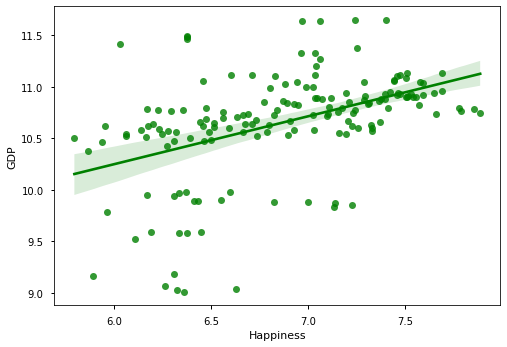

In [ ]:
ax = sns.regplot(x=Economy["Happiness"], y=Economy["GDP"], color='green')

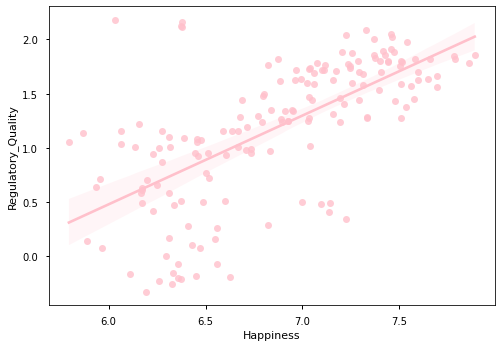

In [ ]:
sns.regplot(x=Economy["Happiness"], y=Economy["Regulatory_Quality"], color='pink')

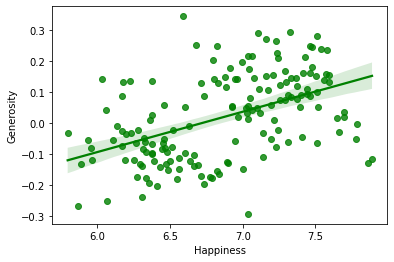

In [ ]:
sns.regplot(x=Economy["Happiness"], y=Economy["Generosity"], color='green')

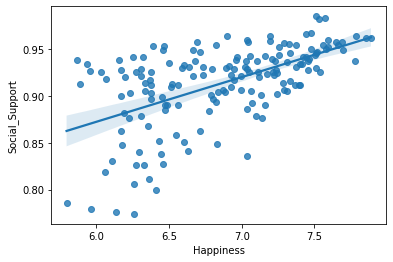

In [ ]:
sns.regplot(x=Economy["Happiness"], y=Economy["Social_Support"])

In [ ]:
VoiceCor = Social["Happiness"].corr(Social["Voice_And_Accountability"])
GenderCor = Social["Happiness"].corr(Social["Women_In_Government"])
LifeExpCor = Social["Happiness"].corr(Social["Life_Expectancy"])
PerceptionsCor = Social["Happiness"].corr(Social["Perceptions of corruption"])
FreedomCor = Social["Happiness"].corr(Social["Freedom to make life choices"])


print("Voice and Accountability Correlation is: ")
print(VoiceCor)
print("Women in Government Correlaion is: ")
print(GenderCor)
print("Life Expectancy Correlation is: ")
print(LifeExpCor)
print("Perceptions of Corruption Correlation is: ")
print(-PerceptionsCor)
print("Freedom Correlation is: ")
print(FreedomCor)
Social_Correlation = ((FreedomCor + LifeExpCor + GenderCor + VoiceCor + (-PerceptionsCor))/5)
print("Overall Social Factors Correlation: ")
print(Social_Correlation)

Voice and Accountability Correlation is: 
0.5138050875011034
Women in Government Correlaion is: 
0.49594358424037227
Life Expectancy Correlation is: 
0.39240773524037204
Perceptions of Corruption Correlation is: 
0.6626720940285145
Freedom Correlation is: 
0.5304082937810242
Overall Social Factors Correlation: 
0.5190473589582772


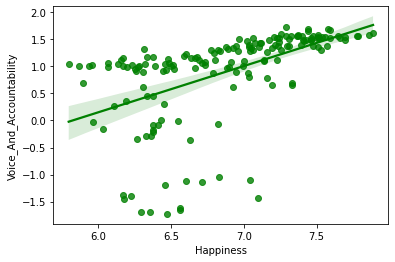

In [ ]:
ax= sns.regplot(x=Social["Happiness"], y=Social["Voice_And_Accountability"], color='green', label="Voice and Accountability")

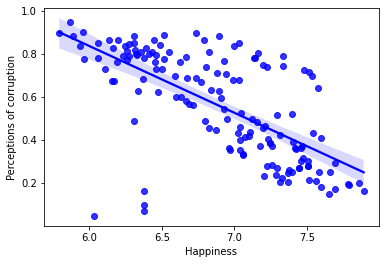

In [ ]:
sns.regplot(x=Social["Happiness"], y=Social["Perceptions of corruption"], color='blue', label="Perceptions of Corruption")

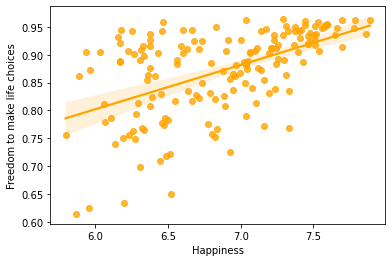

In [ ]:
sns.regplot(x=Social["Happiness"], y=Social["Freedom to make life choices"], color='orange', label="Freedom to make Life Choices")

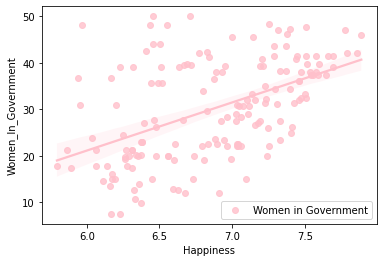

In [ ]:
ax= sns.regplot(x=Social["Happiness"], y=Social["Women_In_Government"], color='pink', label="Women in Government")
ax.legend()

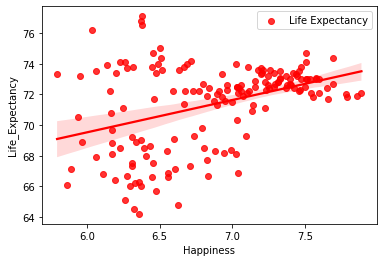

In [ ]:
ax= sns.regplot(x=Social["Happiness"], y=Social["Life_Expectancy"], color='red', label="Life Expectancy")
ax.legend()

In [ ]:
EffectCor = Political["Happiness"].corr(Political["Government_Effectiveness"])
StabilityCor = Political["Happiness"].corr(Political["Stability_And_Absence_Of_Terrorism"])
LawCor = Political["Happiness"].corr(Political["Rule_of_Law"])


print("Government Effectiveness Correlation is: ")
print(EffectCor)
print("Stability and absence of terrorism correlation is: ")
print(StabilityCor)
print("Rule of Law correlation is: ")
print(LawCor)
PoliticalCor = ((EffectCor + StabilityCor + LawCor)/3)
print("Overall Political Correlation is: ")
print(PoliticalCor)

Government Effectiveness Correlation is: 
0.6428004483514798
Stability and absence of terrorism correlation is: 
0.41368560569019963
Rule of Law correlation is: 
0.6869043641641877
Overall Political Correlation is: 
0.5811301394019557


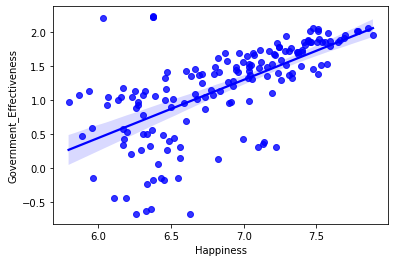

In [ ]:
ax= sns.regplot(x=Political["Happiness"], y=Political["Government_Effectiveness"], color='blue', label="Voice and Accountability")

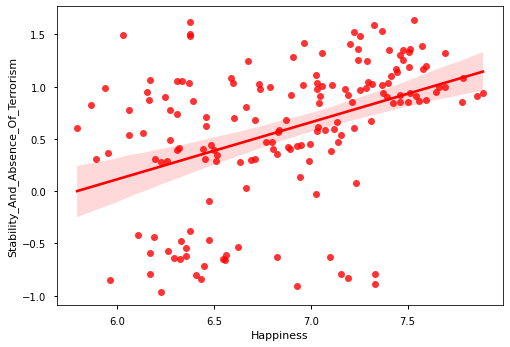

In [ ]:
sns.regplot(x=Political["Happiness"], y=Political["Stability_And_Absence_Of_Terrorism"], color='red')

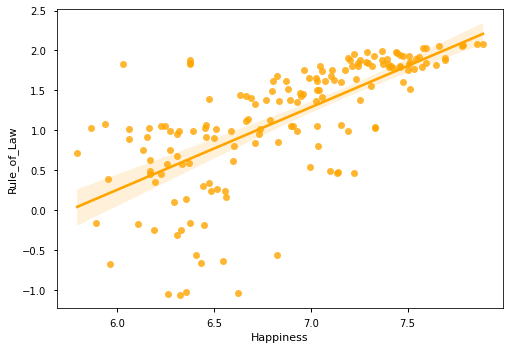

In [ ]:
sns.regplot(x=Political["Happiness"], y=Political["Rule_of_Law"], color='orange')

# How has the happiness score changed nationally over the last 5 years? How does the United States compare?

In [ ]:
TimeSeries = Happiness.copy()
TimeSeries.reset_index(inplace=True)
TimeSeries['Month'] = 1
TimeSeries['Day'] = 1
TimeSeries['Date'] = pd.to_datetime(TimeSeries[["Year", "Month", "Day"]])

In [ ]:
TimeSeries.drop(columns=['Year','Month','Day'], inplace= True)
TimeSeries.set_index('Date', inplace=True)

In [ ]:
AnnualMeans = pd.DataFrame()
AnnualMeans = TimeSeries.groupby(level='Date').mean()
UnitedStates = pd.DataFrame()
UnitedStates = TimeSeries.loc[TimeSeries['Country_Name'] == "United States"]

In [ ]:
UnitedStates.head

<bound method NDFrame.head of              Country_Name  Happiness     GDP  Social_Support  Life_Expectancy  \
Date                                                                            
2016-01-01  United States      6.804  10.986           0.897             68.5   
2017-01-01  United States      6.992  11.001           0.921             68.4   
2018-01-01  United States      6.883  11.025           0.904             68.3   
2019-01-01  United States      6.944  11.043           0.917             68.2   
2020-01-01  United States      7.028  11.001           0.937             68.1   

            Freedom_To_Choose  Generosity  Perceptions_Of_Corruption  \
Date                                                                   
2016-01-01              0.758       0.144                      0.739   
2017-01-01              0.868       0.197                      0.681   
2018-01-01              0.825       0.116                      0.710   
2019-01-01              0.836       0.144 

In [ ]:
Annualtop5 = AnnualMeans[['Happiness','Rule_of_Law', 'Perceptions_Of_Corruption', 'Regulatory_Quality','Government_Effectiveness','Social_Support']].copy()
UStop5 = UnitedStates[['Happiness','Rule_of_Law', 'Perceptions_Of_Corruption', 'Regulatory_Quality','Government_Effectiveness','Social_Support']].copy()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f301d27e050>,
      dtype=object)

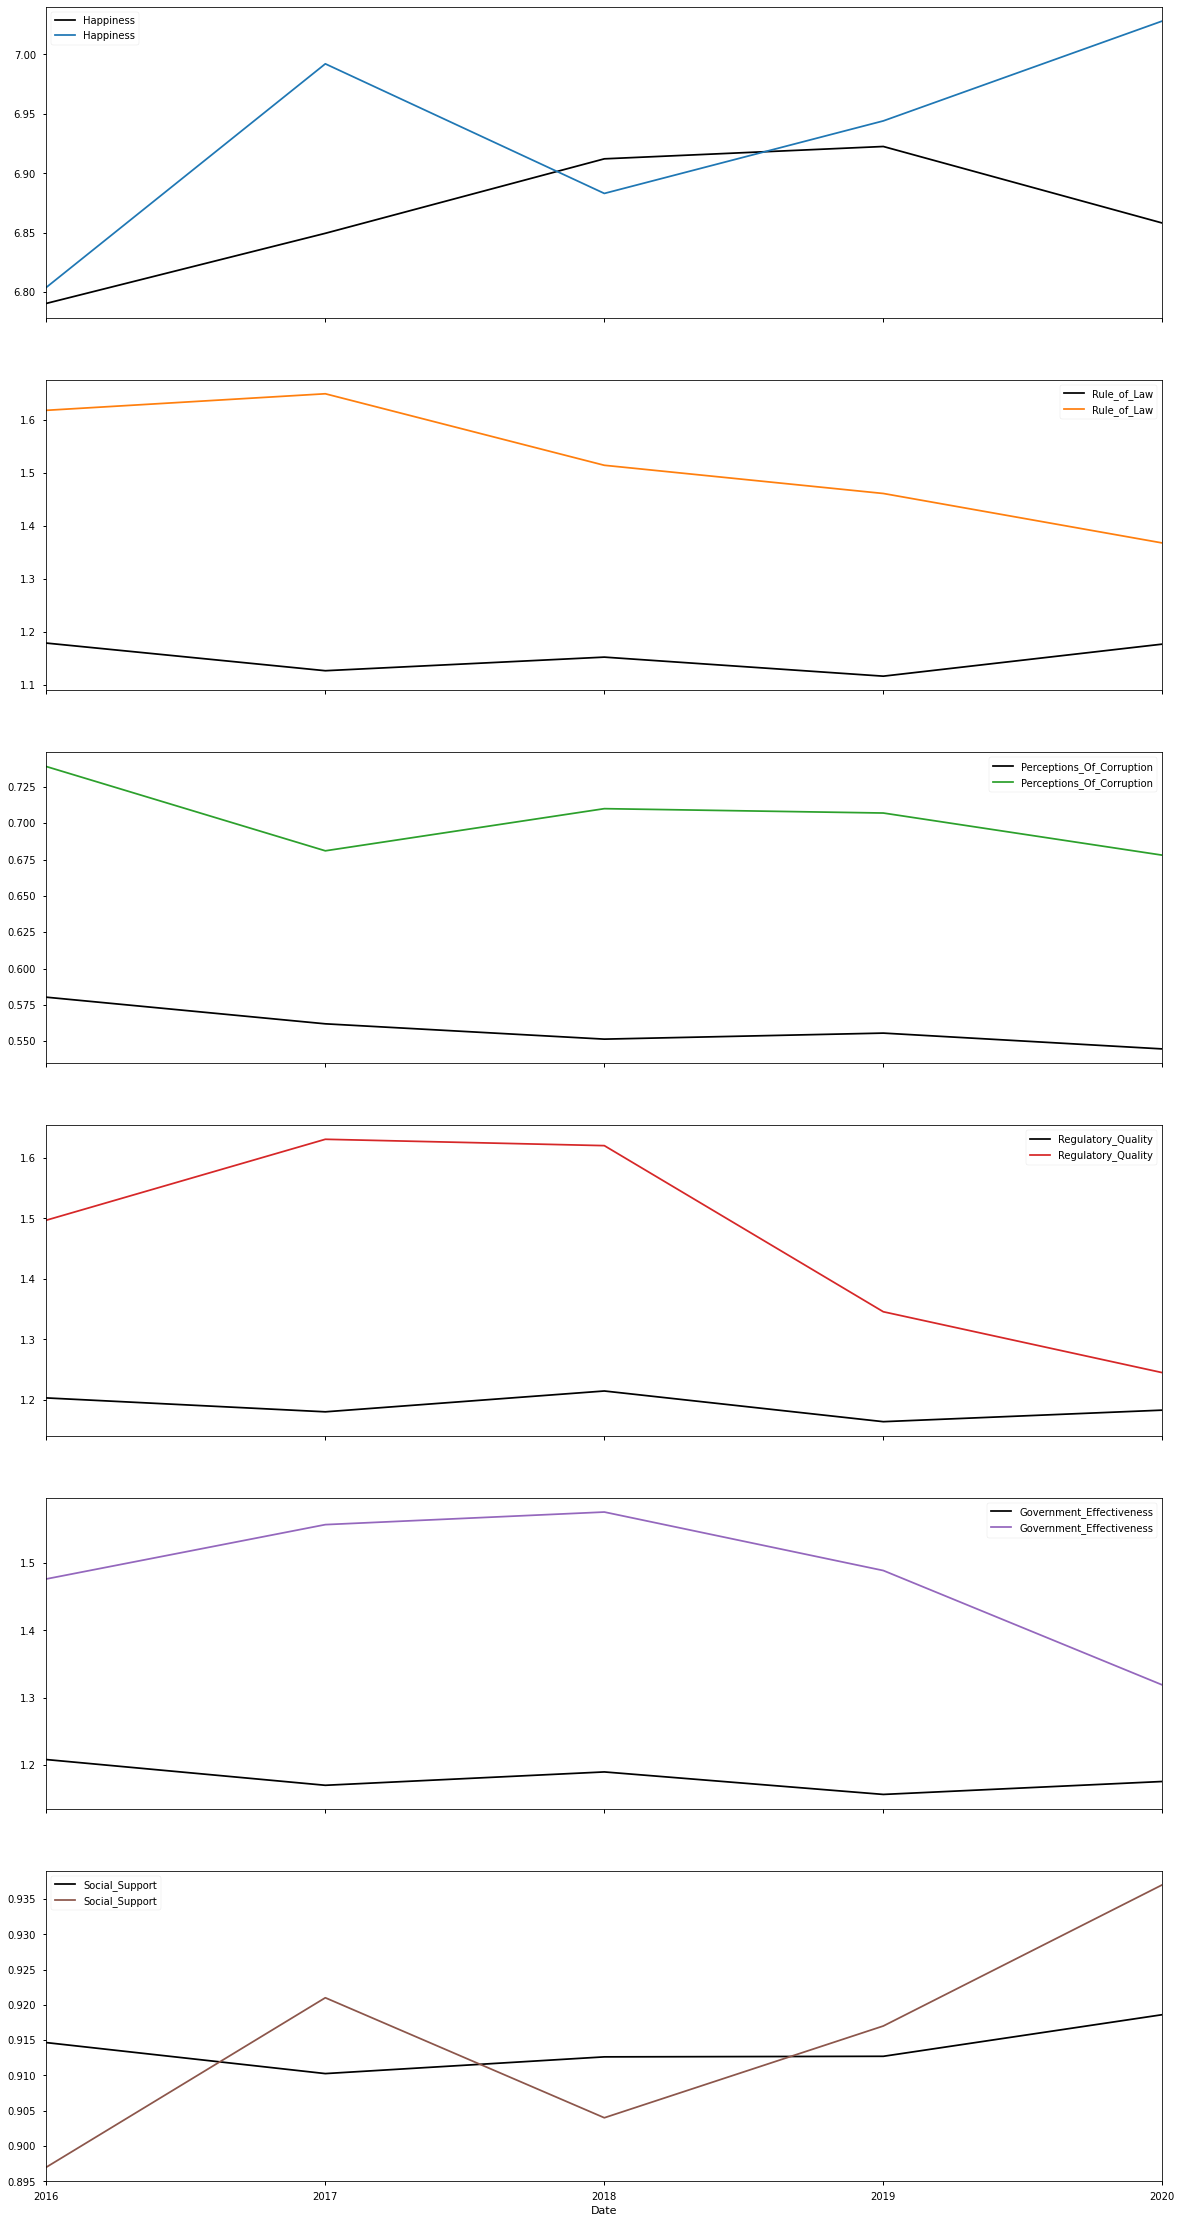

In [ ]:
ax= Annualtop5.plot(subplots=True, figsize=(20,40), color='black', label= 'Average')
UStop5.plot(subplots=True, ax=ax, label='United States')


In [ ]:
Differences = pd.DataFrame()
columns= ['GDP','Women_In_Government','Happiness','Rule_of_Law','Regulatory_Quality','Voice_And_Accountability','Stability_And_Absence_Of_Terrorism','Government_Effectiveness','Perceptions of corruption','Freedom to make life choices','Social_Support','Life_Expectancy']
for x in columns:
  Differences[x]= (UnitedStates[x]-AnnualMeans[x])
Differences['Perceptions of corruption'] = (Differences['Perceptions of corruption'] * -1)
Differences

,GDP,Women_In_Government,Happiness,Rule_of_Law,Regulatory_Quality,Voice_And_Accountability,Stability_And_Absence_Of_Terrorism,Government_Effectiveness,Perceptions of corruption,Freedom to make life choices,Social_Support,Life_Expectancy
Date,,,,,,,,,,,,
2016-01-01,0.333206,-9.158557,0.013500,0.438763,0.294268,0.217932,-0.211006,0.268212,-0.158742,-0.096412,-0.017647,-2.476471
2017-01-01,0.371429,-9.174938,0.142543,0.522054,0.451245,0.127749,-0.293783,0.387096,-0.119063,-0.007029,0.010743,-2.671429
2018-01-01,0.344906,-6.130630,-0.029094,0.361628,0.406250,0.047832,-0.174320,0.385964,-0.158600,-0.037125,-0.008625,-3.128125
2019-01-01,0.387147,-7.950778,0.021529,0.344361,0.181985,0.055333,-0.434434,0.332495,-0.151452,-0.046471,0.004294,-3.314706
2020-01-01,0.342429,-5.399342,0.169900,0.190700,0.062082,-0.047460,-0.586869,0.143386,-0.133333,-0.031900,0.018400,-3.730000


In [ ]:
import seaborn as sns
from math import log, sqrt, sin
import matplotlib.pyplot as plt
import matplotlib
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
plt.style.use("seaborn-notebook")

Happiness2.reset_index(inplace=True)


fig = px.choropleth(Happiness2.sort_values('Year'),
                   locations = 'Country_Name',
                   color = 'Happiness',
                   locationmode = 'country names',
                   animation_frame = 'Year')
fig.update_layout(title = 'Happiness')
fig.show()

# What does the standard of happiness look like in the United States vs. other "happy" countries?

In [ ]:
UnitedStates.head()

,Country_Name,Happiness,GDP,Social_Support,Life_Expectancy,Freedom_To_Choose,Generosity,Perceptions_Of_Corruption,Control_Of_Corruption,Government_Effectiveness,Stability_And_Absence_Of_Terrorism,Voice_And_Accountability,Regulatory_Quality,Rule_of_Law,Women_In_Government
Date,,,,,,,,,,,,,,,
2016-01-01,United States,6.804,10.986,0.897,68.5,0.758,0.144,0.739,1.373549,1.476340,0.402303,1.110259,1.497076,1.618124,19.168591
2017-01-01,United States,6.992,11.001,0.921,68.4,0.868,0.197,0.681,1.384251,1.557018,0.291818,1.008988,1.631051,1.649322,19.354839
2018-01-01,United States,6.883,11.025,0.904,68.3,0.825,0.116,0.710,1.328869,1.575724,0.421418,0.976364,1.620526,1.514515,23.502304
2019-01-01,United States,6.944,11.043,0.917,68.2,0.836,0.144,0.707,1.215634,1.488845,0.134975,0.903805,1.345472,1.461360,23.433875
2020-01-01,United States,7.028,11.001,0.937,68.1,0.850,0.034,0.678,1.068838,1.318942,-0.022033,0.868937,1.244659,1.368086,27.464789


In [ ]:
from scipy.stats import spearmanr

Correlations = {}
PVal = {}
US = {}
International = {}


for x in columns: 
      rho, p = spearmanr(Happiness2['Happiness'], Happiness2[x], nan_policy='omit')
      Correlations[x] = round(rho, 3)
      PVal[x] = round(p,0)
print(Correlations)
print(PVal)

{'GDP': 0.553, 'Women_In_Government': 0.515, 'Happiness': 1.0, 'Rule_of_Law': 0.764, 'Regulatory_Quality': 0.695, 'Voice_And_Accountability': 0.753, 'Stability_And_Absence_Of_Terrorism': 0.459, 'Government_Effectiveness': 0.719, 'Perceptions of corruption': -0.684, 'Freedom to make life choices': 0.559, 'Social_Support': 0.575, 'Life_Expectancy': 0.312}
{'GDP': 0.0, 'Women_In_Government': 0.0, 'Happiness': 0.0, 'Rule_of_Law': 0.0, 'Regulatory_Quality': 0.0, 'Voice_And_Accountability': 0.0, 'Stability_And_Absence_Of_Terrorism': 0.0, 'Government_Effectiveness': 0.0, 'Perceptions of corruption': 0.0, 'Freedom to make life choices': 0.0, 'Social_Support': 0.0, 'Life_Expectancy': 0.0}


In [ ]:
import statsmodels.formula.api as smf

# Initialise and fit linear regression model using `statsmodels`
model = smf.ols('Happiness ~ Stability_And_Absence_Of_Terrorism', data=AnnualMeans)
model = model.fit()
model.predict({'Stability_And_Absence_Of_Terrorism':-.02})


0    7.786798
dtype: float64

In [ ]:
AnnualMeans.rename(columns={'Perceptions of corruption': 'Perceptions_Of_Corruption', 'Freedom to make life choices': 'Freedom_To_Choose'},  inplace=True)
UnitedStates.rename(columns={'Perceptions of corruption': 'Perceptions_Of_Corruption', 'Freedom to make life choices': 'Freedom_To_Choose'},  inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:

predictions = {}
for x in (AnnualMeans.columns):
  key = ('Happiness ~ ' + x)
  model = smf.ols(key, data=AnnualMeans)
  model = model.fit()
  new_X = UnitedStates[x]
  a = model.predict({x: new_X})
  predictions[x] = a

In [ ]:
Predictions = pd.DataFrame(predictions)
Predictions['Happiness'] = UnitedStates['Happiness']
Predictions

,Happiness,GDP,Social_Support,Life_Expectancy,Freedom_To_Choose,Generosity,Perceptions_Of_Corruption,Control_Of_Corruption,Government_Effectiveness,Stability_And_Absence_Of_Terrorism,Voice_And_Accountability,Regulatory_Quality,Rule_of_Law,Women_In_Government
Date,,,,,,,,,,,,,,
2016-01-01,6.804,7.316955,6.935143,6.616484,6.622436,6.746094,6.355507,6.700564,6.335539,7.145253,6.821438,6.652418,6.317052,6.729246
2017-01-01,6.992,7.337391,6.836923,6.607754,6.859651,6.695259,6.519951,6.691924,6.191007,7.313098,6.842492,6.559432,6.280371,6.731574
2018-01-01,6.883,7.370088,6.906496,6.599024,6.766922,6.772951,6.437729,6.736634,6.157496,7.116215,6.849275,6.566737,6.438868,6.783433
2019-01-01,6.944,7.394610,6.853293,6.590294,6.790643,6.746094,6.446234,6.828049,6.313137,7.551366,6.864360,6.757640,6.501365,6.782577
2020-01-01,7.028,7.337391,6.771443,6.581564,6.820834,6.851602,6.528456,6.946558,6.617513,7.789886,6.871609,6.827610,6.611030,6.832978


In [ ]:
Predictions.index
df16 = Predictions.loc[:'2016-01-01']
df17 = Predictions.loc['2017-01-01']
df18 = Predictions.loc['2018-01-01']
df19 = Predictions.loc['2019-01-01']
df20 = Predictions.loc['2020-01-01']

            Happiness       GDP  Social_Support  Life_Expectancy  \
Date                                                               
2016-01-01      6.804  7.316955        6.935143         6.616484   

            Freedom_To_Choose  Generosity  Perceptions_Of_Corruption  \
Date                                                                   
2016-01-01           6.622436    6.746094                   6.355507   

            Control_Of_Corruption  Government_Effectiveness  \
Date                                                          
2016-01-01               6.700564                  6.335539   

            Stability_And_Absence_Of_Terrorism  Voice_And_Accountability  \
Date                                                                       
2016-01-01                            7.145253                  6.821438   

            Regulatory_Quality  Rule_of_Law  Women_In_Government  
Date                                                              
2016-01-01            6.6

I saw some interesting results in the model regarding corruption and terrorism scores, as our scores seem to predict a higher happiness, despite the value being a negative attribute. Due to this, I split the values to allow for viewing with and without those factors. 

In [ ]:
Scores = pd.DataFrame()
Scores['Overall_Score'] = ((Predictions['GDP'] + Predictions['Social_Support'] + Predictions['Life_Expectancy'] + Predictions['Freedom_To_Choose'] +
                                  Predictions['Generosity'] + Predictions['Perceptions_Of_Corruption'] + Predictions['Government_Effectiveness'] +
                                  Predictions['Stability_And_Absence_Of_Terrorism'] + Predictions['Voice_And_Accountability'] + Predictions['Regulatory_Quality']
                                  + Predictions['Rule_of_Law'] + Predictions['Women_In_Government']) / 12)
Scores['Score'] = ((Predictions['GDP'] + Predictions['Social_Support'] + Predictions['Life_Expectancy'] + Predictions['Freedom_To_Choose'] +
                                  Predictions['Generosity'] + Predictions['Government_Effectiveness']  + Predictions['Voice_And_Accountability'] 
                                  + Predictions['Regulatory_Quality'] + Predictions['Rule_of_Law'] + Predictions['Women_In_Government']) / 10)
Scores['Actual_Happiness'] = Predictions['Happiness']
print(Scores)

            Overall_Score     Score  Actual_Happiness
Date                                                 
2016-01-01       6.716130  6.709281             6.804
2017-01-01       6.731242  6.694186             6.992
2018-01-01       6.730436  6.721129             6.883
2019-01-01       6.799301  6.759401             6.944
2020-01-01       6.870160  6.812357             7.028


(6.6, 7.1)

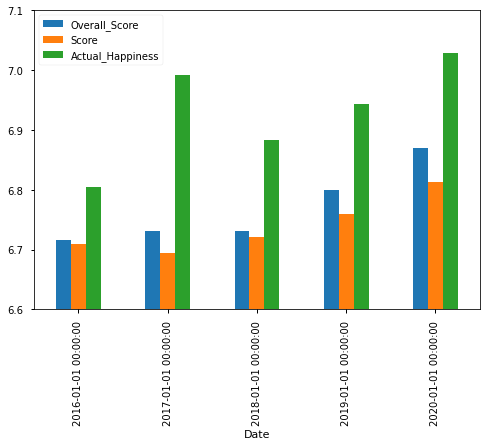

In [ ]:
Scores.plot.bar()
plt.ylim(6.6, 7.1)

In [ ]:
predictionschk = {}
for x in (AnnualMeans.columns):
  key = ('Happiness ~ ' + x)
  model = smf.ols(key, data=AnnualMeans)
  model = model.fit()
  new_X = AnnualMeans[x]
  a = model.predict({x: new_X})
  predictionschk[x] = a
print(predictionschk)

{'Happiness': Date
2016-01-01    6.790500
2017-01-01    6.849457
2018-01-01    6.912094
2019-01-01    6.922471
2020-01-01    6.858100
dtype: float64, 'GDP': Date
2016-01-01    6.863006
2017-01-01    6.831368
2018-01-01    6.900198
2019-01-01    6.867173
2020-01-01    6.870877
dtype: float64, 'Social_Support': Date
2016-01-01    6.862923
2017-01-01    6.880888
2018-01-01    6.871198
2019-01-01    6.870867
2020-01-01    6.846745
dtype: float64, 'Life_Expectancy': Date
2016-01-01    6.832680
2017-01-01    6.840970
2018-01-01    6.872110
2019-01-01    6.879668
2020-01-01    6.907193
dtype: float64, 'Freedom_To_Choose': Date
2016-01-01    6.830348
2017-01-01    6.874808
2018-01-01    6.846982
2019-01-01    6.890857
2020-01-01    6.889626
dtype: float64, 'Generosity': Date
2016-01-01    6.832080
2017-01-01    6.821978
2018-01-01    6.896443
2019-01-01    6.883109
2020-01-01    6.899012
dtype: float64, 'Perceptions_Of_Corruption': Date
2016-01-01    6.805578
2017-01-01    6.857521
2018-01-01 

In [ ]:
PredictionsChk = pd.DataFrame(predictionschk)
PredictionsChk['Happiness'] = AnnualMeans['Happiness']
PredictionsChk

,Happiness,GDP,Social_Support,Life_Expectancy,Freedom_To_Choose,Generosity,Perceptions_Of_Corruption,Control_Of_Corruption,Government_Effectiveness,Stability_And_Absence_Of_Terrorism,Voice_And_Accountability,Regulatory_Quality,Rule_of_Law,Women_In_Government
Date,,,,,,,,,,,,,,
2016-01-01,6.790500,6.863006,6.862923,6.832680,6.830348,6.832080,6.805578,6.822823,6.816032,6.824702,6.866746,6.856657,6.832921,6.843760
2017-01-01,6.849457,6.831368,6.880888,6.840970,6.874808,6.821978,6.857521,6.894079,6.884478,6.866795,6.869051,6.872621,6.894168,6.846294
2018-01-01,6.912094,6.900198,6.871198,6.872110,6.846982,6.896443,6.887398,6.851189,6.848938,6.851394,6.859219,6.848697,6.864047,6.860088
2019-01-01,6.922471,6.867173,6.870867,6.879668,6.890857,6.883109,6.875636,6.895239,6.908790,6.891391,6.875863,6.883948,6.906243,6.881990
2020-01-01,6.858100,6.870877,6.846745,6.907193,6.889626,6.899012,6.906488,6.869292,6.874384,6.898339,6.861742,6.870698,6.835243,6.900489


In [ ]:
Scorechk = pd.DataFrame()
Scorechk['Overall_Score'] = ((PredictionsChk['GDP'] + PredictionsChk['Social_Support'] + PredictionsChk['Life_Expectancy'] + PredictionsChk['Freedom_To_Choose'] +
                                  PredictionsChk['Generosity'] + PredictionsChk['Perceptions_Of_Corruption'] + PredictionsChk['Government_Effectiveness'] +
                                  PredictionsChk['Stability_And_Absence_Of_Terrorism'] + PredictionsChk['Voice_And_Accountability'] + PredictionsChk['Regulatory_Quality']
                                  + PredictionsChk['Rule_of_Law'] + PredictionsChk['Women_In_Government']) / 12)
Scorechk['Score'] = ((PredictionsChk['GDP'] + PredictionsChk['Social_Support'] + PredictionsChk['Life_Expectancy'] + PredictionsChk['Freedom_To_Choose'] +
                                  PredictionsChk['Generosity'] + PredictionsChk['Government_Effectiveness']  + PredictionsChk['Voice_And_Accountability'] 
                                  + PredictionsChk['Regulatory_Quality'] + PredictionsChk['Rule_of_Law'] + PredictionsChk['Women_In_Government']) / 10)
Scorechk['Actual Happiness'] = PredictionsChk['Happiness']
Scorechk

,Overall_Score,Score,Actual Happiness
Date,,,
2016-01-01,6.838953,6.843715,6.790500
2017-01-01,6.861745,6.861662,6.849457
2018-01-01,6.867226,6.866792,6.912094
2019-01-01,6.884628,6.884851,6.922471
2020-01-01,6.880070,6.875601,6.858100
